# Análisis de sentimientos

Angel Israel Hernandez Testa<br>
5BV1 TLN-IA<br>
2022630048

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
plt.style.use('ggplot')

### EDA

In [2]:
# Cargar el dataset
df = pd.read_csv('Reviews.csv')
# Imprimir las primeras 5 filas
print(df.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [3]:
# Total de dimensiones
print("Numero de columnas: ", len(df.columns))
print("Nombre de las columnas: ", df.columns.to_list())
#Descripcion de las columnas con sus tipos de datos
print(df.info())

Numero de columnas:  10
Nombre de las columnas:  ['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB
None


In [4]:
# Estadísticas básicas de las columnas numéricas con 2 decimales
print(df.describe())

                  Id  HelpfulnessNumerator  HelpfulnessDenominator  \
count  568454.000000         568454.000000            568454.00000   
mean   284227.500000              1.743817                 2.22881   
std    164098.679298              7.636513                 8.28974   
min         1.000000              0.000000                 0.00000   
25%    142114.250000              0.000000                 0.00000   
50%    284227.500000              0.000000                 1.00000   
75%    426340.750000              2.000000                 2.00000   
max    568454.000000            866.000000               923.00000   

               Score          Time  
count  568454.000000  5.684540e+05  
mean        4.183199  1.296257e+09  
std         1.310436  4.804331e+07  
min         1.000000  9.393408e+08  
25%         4.000000  1.271290e+09  
50%         5.000000  1.311120e+09  
75%         5.000000  1.332720e+09  
max         5.000000  1.351210e+09  


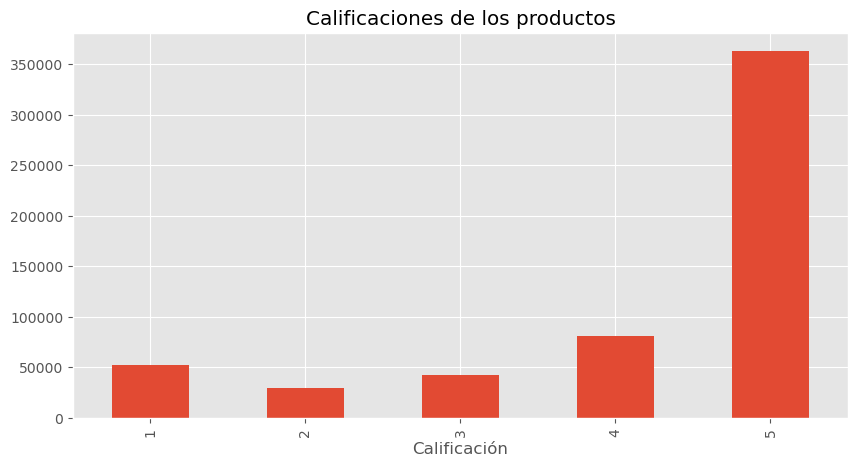

In [5]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Calificaciones de los productos',
          figsize=(10, 5))
ax.set_xlabel('Calificación')
plt.show()

### Preprocesamiento<br>
Para el análisis de sentimientos las columnas que nos interesan son 'Score' y 'Text'. Pero usaremos la columna 'HelpfulnessNumerator' para seleccionar las reseñas que otros usuarios encontraron más útiles para obtener las más confiables, también debido a la gran cantidad de instancias se usaran unicamente 10000 reseñas. Posteriormente se hará una clasificación de sentimiento basandose en la calificación de la reseña ('Score') y se hará un balance para tener la misma cantidad de instancias de cada clase, quedando al rededor de 700 de cada una.

In [6]:
# Ordenar el DataFrame por 'HelpfulnessNumerator' en orden descendente
df_sorted = df.sort_values(by='HelpfulnessNumerator', ascending=False)

# Seleccionar las primeras 500 filas
df_top_500 = df_sorted.head(10000)
# Seleccionar las columnas 'Score' y 'Text'
data = df_top_500[['Score', 'Text']]
print(data)


        Score                                               Text
190733      5  see update at end of review<br /><br />*******...
207712      3  I ordered one of these Fresh "Whole" Rabbits, ...
566779      5  I purchased a burrito from a small shop a few ...
235722      1  This product is called "Hunmatsu-RyokuCha," in...
210511      5  This Ecobrew reusable Keurig K-cup is great fo...
...       ...                                                ...
461301      5  This is a great tasting snack with only 130 ca...
193435      3  There is so much sugar in this that I can't st...
517323      5  This is very good roasted seaweed.  Excellent,...
156426      3  I just sent this as a wedding gift last week, ...
487998      5  From all the original Senseo Coffee Pods, I li...

[10000 rows x 2 columns]


In [7]:
# Convertir Calificación a 'Sentiment'
def score_to_sentiment(score):
    if score in [1, 2]:
        return 'Negativo'
    elif score == 3:
        return 'Neutral'
    elif score in [4, 5]:
        return 'Positivo'
# Aplicar la función a la columna 'Score' y crear una nueva columna 'Sentiment'
data['Sentiment'] = data['Score'].apply(score_to_sentiment)
print(data.head())

        Score                                               Text Sentiment
190733      5  see update at end of review<br /><br />*******...  Positivo
207712      3  I ordered one of these Fresh "Whole" Rabbits, ...   Neutral
566779      5  I purchased a burrito from a small shop a few ...  Positivo
235722      1  This product is called "Hunmatsu-RyokuCha," in...  Negativo
210511      5  This Ecobrew reusable Keurig K-cup is great fo...  Positivo


C:\Users\angel\AppData\Local\Temp\ipykernel_19488\3788519968.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment'] = data['Score'].apply(score_to_sentiment)


In [8]:
# Validar el balance de clases
class_counts = data['Sentiment'].value_counts()
print("Balance de clases antes del balanceo:")
print(class_counts)

# Balancear las clases (submuestreo de clases mayoritarias)
# Encontrar el tamaño de la clase menoritaria
min_class_size = class_counts.min()
print("Tamaño de la clase minoritaria: ", min_class_size)

Balance de clases antes del balanceo:
Sentiment
Positivo    7106
Negativo    2190
Neutral      704
Name: count, dtype: int64
Tamaño de la clase minoritaria:  704


In [9]:
from sklearn.utils import resample
# Submuestrear clases mayoritarias
balanced_df = pd.concat([
    resample(data[data['Sentiment'] == 'Negativo'], 
             replace=False, n_samples=min_class_size, random_state=123),
    resample(data[data['Sentiment'] == 'Neutral'], 
             replace=False, n_samples=min_class_size, random_state=123),
    resample(data[data['Sentiment'] == 'Positivo'], 
             replace=False, n_samples=min_class_size, random_state=123)
])

# Validar el balance de clases después del balanceo
balanced_class_counts = balanced_df['Sentiment'].value_counts()
print("Balance de clases después del balanceo:")
print(balanced_class_counts)

# Imprimir las primeras 5 filas del DataFrame balanceado
print(balanced_df.head())


Balance de clases después del balanceo:
Sentiment
Negativo    704
Neutral     704
Positivo    704
Name: count, dtype: int64
        Score                                               Text Sentiment
565875      2  My dog loved this toy/treat, and then I notice...  Negativo
292124      1  I ordered this honey for it's medicinal qualit...  Negativo
418934      1  The pee post is larger than i expected and sme...  Negativo
510286      1  While these are tasty snacks, there is virtual...  Negativo
139422      1  I saw the words Natural Flavors on the label o...  Negativo


### Limpieza de Texto

In [10]:
import re
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))
# Remover etiquetas HTML
def remove_html_tags(text):
    return re.sub(r'<.*?>', '', text)
# Remover todo lo que no sea texto
def remove_non_text(text):
    return re.sub(r'[^a-zA-Z]', ' ', text)
# Convertir a minúsculas
def to_lower(text):
    return text.lower()
# Remover palabras vacías

def remove_stopwords(text):
    words = text.split()
    return ' '.join([word for word in words if word not in stopwords])

In [11]:
# Aplicar las funciones de preprocesamiento a la columna 'Text'
balanced_df['Text'] = balanced_df['Text'].apply(remove_html_tags)
balanced_df['Text'] = balanced_df['Text'].apply(remove_non_text)
balanced_df['Text'] = balanced_df['Text'].apply(to_lower)
balanced_df['Text'] = balanced_df['Text'].apply(remove_stopwords)
#Imprimer el texto preprocesado de todas las filas
for text in balanced_df['Text']:
    print(text)

dog loved toy treat noticed fine print cardboard came made china dog consumed treats adverse effects cannot continue buy concern might get bad batch make sick disappointed dog
ordered honey medicinal qualities arrived lid honey everywhere due inadequate improper packing returns accepted total loss trash went
pee post larger expected smells urine probably pheramones attract dog installed yard per directions brought year old directly usual pee time tried get sniff pay attention success seen take one sniff passing never done business even close pee post maybe would work puppies trained yet work dog
tasty snacks virtually nutritional value quick check label shows insignificant amounts vitamins even vitamin c varieties insignificant mean less rda far one might find claimed apples pears per package add ingredients thing listed freeze dried fruit label appear additives even sugar kind strictly bad snack certainly qualifies empty calories frankly get vitamins bag potato chips addition made chi

## Análisis de sentimientos usando diccionarios

Para el análisis de sentimientos usando diccionarios no es necesario transformar más el texto. Basta con la limpieza previa (convertir a minúsculas, remover stopwords, eliminar puntuación, etc.) y con la posterior tokenización de cada texto para realizar el análisis.

### Hardvard IV-4

In [12]:
import pysentiment2 as ps
# Crear un objeto de la clase HIV4
hiv4 = ps.HIV4()
# Función para analizar el sentimiento de un texto con HIV4
def analyze_sentiment(text):
    tokens = hiv4.tokenize(text)
    score = hiv4.get_score(tokens)
    return score

# Aplicar la función 'analyze_sentiment' a la columna 'Text'
balanced_df['SentimentScore'] = balanced_df['Text'].apply(analyze_sentiment)
# Imprimir todos los scores de sentimiento con sus respectivas etiquetas
for i in range(len(balanced_df)):
    print(balanced_df['Sentiment'].iloc[i], balanced_df['SentimentScore'].iloc[i])

Negativo {'Positive': 4, 'Negative': 6, 'Polarity': -0.19999998000000202, 'Subjectivity': 0.4999999750000012}
Negativo {'Positive': 4, 'Negative': 3, 'Polarity': 0.1428571224489825, 'Subjectivity': 0.49999996428571686}
Negativo {'Positive': 5, 'Negative': 2, 'Polarity': 0.4285713673469475, 'Subjectivity': 0.19999999428571447}
Negativo {'Positive': 19, 'Negative': 22, 'Polarity': -0.07317072992266513, 'Subjectivity': 0.33064515862382937}
Negativo {'Positive': 12, 'Negative': 4, 'Polarity': 0.4999999687500019, 'Subjectivity': 0.22535210950208298}
Negativo {'Positive': 40, 'Negative': 36, 'Polarity': 0.052631578254847655, 'Subjectivity': 0.27941176367863324}
Negativo {'Positive': 5, 'Negative': 8, 'Polarity': -0.23076921301775286, 'Subjectivity': 0.4333333188888894}
Negativo {'Positive': 5, 'Negative': 3, 'Polarity': 0.24999996875000394, 'Subjectivity': 0.399999980000001}
Negativo {'Positive': 2, 'Negative': 0, 'Polarity': 0.99999950000025, 'Subjectivity': 0.11764705190311459}
Negativo {'

### Opinion Lexicon

In [13]:
# Importar el léxico de Opinion Lexicon
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize
# Crear conjuntos de palabras positivas y negativas
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())
# Función para analizar el sentimiento de un texto con Opinion Lexicon
def analyze_sentiment(text):
    tokens = word_tokenize(text) # tokenizar
    positive_score = sum(1 for word in tokens if word in positive_words) # Contar palabras positivas
    negative_score = sum(1 for word in tokens if word in negative_words) # Contar palabras negativas
    return {'Positive': positive_score, 'Negative': negative_score} # Retornar un diccionario con los scores
# Analizar el sentimiento de las reseñas con Opinion Lexicon
balanced_df['OL_Positive'] = balanced_df['Text'].apply(lambda x: analyze_sentiment(x)['Positive']) 
balanced_df['OL_Negative'] = balanced_df['Text'].apply(lambda x: analyze_sentiment(x)['Negative'])
# Imprimir los scores de sentimiento de Opinion Lexicon
for i in range(len(balanced_df)):
    print(balanced_df['Sentiment'].iloc[i],"Positivo:", balanced_df['OL_Positive'].iloc[i],"Negativo: ", balanced_df['OL_Negative'].iloc[i], "Total: ", balanced_df['OL_Positive'].iloc[i] - balanced_df['OL_Negative'].iloc[i])


Negativo Positivo: 2 Negativo:  5 Total:  -3
Negativo Positivo: 0 Negativo:  4 Total:  -4
Negativo Positivo: 3 Negativo:  1 Total:  2
Negativo Positivo: 8 Negativo:  16 Total:  -8
Negativo Positivo: 5 Negativo:  4 Total:  1
Negativo Positivo: 19 Negativo:  22 Total:  -3
Negativo Positivo: 3 Negativo:  6 Total:  -3
Negativo Positivo: 5 Negativo:  2 Total:  3
Negativo Positivo: 1 Negativo:  2 Total:  -1
Negativo Positivo: 5 Negativo:  1 Total:  4
Negativo Positivo: 3 Negativo:  1 Total:  2
Negativo Positivo: 2 Negativo:  1 Total:  1
Negativo Positivo: 3 Negativo:  6 Total:  -3
Negativo Positivo: 10 Negativo:  12 Total:  -2
Negativo Positivo: 15 Negativo:  6 Total:  9
Negativo Positivo: 0 Negativo:  1 Total:  -1
Negativo Positivo: 1 Negativo:  0 Total:  1
Negativo Positivo: 5 Negativo:  4 Total:  1
Negativo Positivo: 3 Negativo:  3 Total:  0
Negativo Positivo: 1 Negativo:  1 Total:  0
Negativo Positivo: 4 Negativo:  2 Total:  2
Negativo Positivo: 7 Negativo:  6 Total:  1
Negativo Positivo

## Análisis de sentimientos con algoritmos de ML

### Transformación de datos

In [14]:
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
# Crear un lematizador y un vectorizador
lemmatizer = WordNetLemmatizer()
vectorizer = TfidfVectorizer()
# Tokenizar y lematizar el texto
def lemmatize_text(text):
    words = text.split()
    return ' '.join([lemmatizer.lemmatize(word) for word in words])
# vectorizar el texto con Tfidf
def vectorize_text(text):
    return vectorizer.fit_transform(text)

### Modelo de Regresión Logística

Accuracy: 0.7399527186761229
Classification Report:
              precision    recall  f1-score   support

    Negativo       0.79      0.74      0.76       150
     Neutral       0.72      0.68      0.70       133
    Positivo       0.72      0.79      0.75       140

    accuracy                           0.74       423
   macro avg       0.74      0.74      0.74       423
weighted avg       0.74      0.74      0.74       423



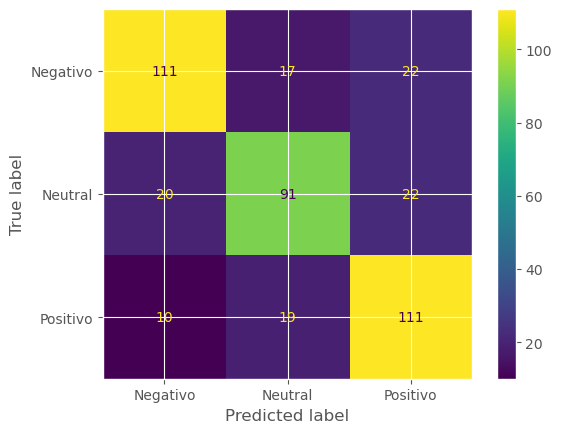

In [15]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Lematizar el texto
balanced_df['Text'] = balanced_df['Text'].apply(lemmatize_text)
# Vectorizar el texto
X = vectorize_text(balanced_df['Text']).toarray()
# Las etiquetas de clase son las columnas 'Sentiment'
y = balanced_df['Sentiment']
# Dividir el conjunto de datos en entrenamiento 80% y prueba 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()


### Árboles de decisión

Accuracy: 0.6170212765957447
Classification Report:
              precision    recall  f1-score   support

    Negativo       0.62      0.65      0.64       150
     Neutral       0.59      0.62      0.60       133
    Positivo       0.64      0.58      0.61       140

    accuracy                           0.62       423
   macro avg       0.62      0.62      0.62       423
weighted avg       0.62      0.62      0.62       423



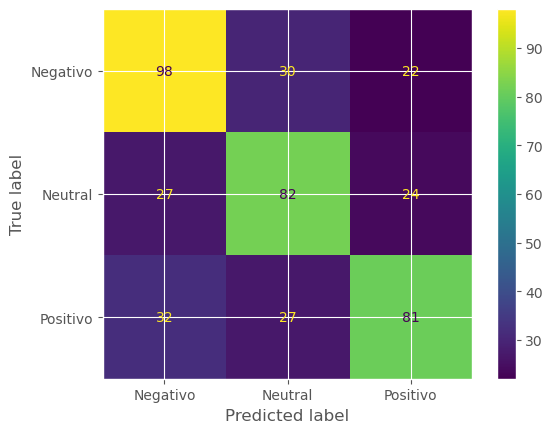

In [16]:
# Analisis de sentimientos con arboles de decision
from sklearn.tree import DecisionTreeClassifier
# Entrenar un modelo de árbol de decisión
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

### Suport Vector Machines (SVM)

Accuracy: 0.7541371158392435
Classification Report:
              precision    recall  f1-score   support

    Negativo       0.77      0.77      0.77       150
     Neutral       0.79      0.63      0.70       133
    Positivo       0.72      0.86      0.78       140

    accuracy                           0.75       423
   macro avg       0.76      0.75      0.75       423
weighted avg       0.76      0.75      0.75       423



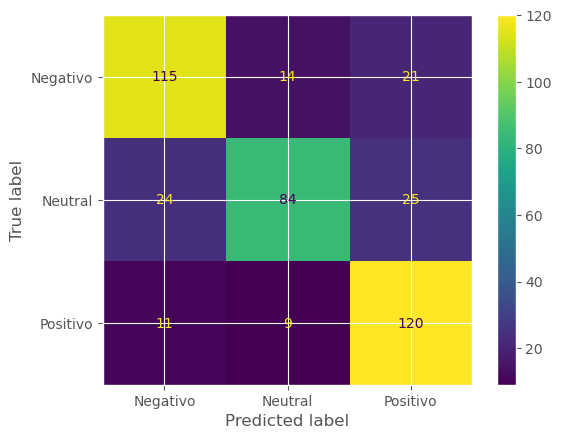

In [17]:
# Analisis de sentimientos con SVM
from sklearn.svm import SVC
# Entrenar un modelo de SVM
model = SVC()
model.fit(X_train, y_train)
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()


### Comparación

In [18]:
# Definir los modelos
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC()
}

# Evaluar cada modelo usando validación cruzada
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
    print(f"{model_name} - Accuracy: {np.mean(scores):.2f} ± {np.std(scores):.2f}")

Logistic Regression - Accuracy: 0.69 ± 0.01
Decision Tree - Accuracy: 0.59 ± 0.03
SVM - Accuracy: 0.71 ± 0.01


## Análisis de sentimientos usando word embbedings y redes neuronales

### Transformación de datos

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
# Crear un objeto Tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
# Ajustar el Tokenizer al texto
tokenizer.fit_on_texts(balanced_df['Text'])
# Convertir el texto a secuencias de números (One-hot encoding)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(balanced_df['Text'])
# Rellenar las secuencias para que tengan la misma longitud
padded_sequences = pad_sequences(sequences, maxlen=100, truncating='post')
# convertir las etiquetas de clase a One-hot encoding
sentiment_labels = pd.get_dummies(balanced_df['Sentiment']).values

### Capa de Word embeddings preconstruida (GloVe)

In [20]:
# función para cargar los embeddings GloVe
def load_glove_embeddings(filepath):
    embeddings_index = {}
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefficients = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefficients
    return embeddings_index
# Cargar los embeddings GloVe
embeddings_index = load_glove_embeddings('glove.6B.100d.txt')
# Función para crear la matriz de embeddings
def create_embedding_matrix(word_index, embeddings_index, embedding_dim):
    embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

# Crear la matriz de embeddings
embedding_dim = 100  # Dimensión de los embeddings GloVe
embedding_matrix = create_embedding_matrix(word_index, embeddings_index, embedding_dim)

# Dividir el conjunto de datos en entrenamiento 80% y prueba 20%
x_train, x_test, y_train, y_test = train_test_split(padded_sequences, sentiment_labels, test_size=0.2, random_state=42)
# Crear un modelo de red neuronal convolucional
model = Sequential()
# Añadir una capa de embeddings con los embeddings GloVe
model.add(Embedding(input_dim=len(word_index) + 1, 
                    output_dim=embedding_dim, 
                    weights=[embedding_matrix], 
                    input_length=100, 
                    trainable=False))
model.add(Conv1D(64, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
# Entrenar el modelo
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))
# Evaluar el modelo
y_pred = np.argmax(model.predict(x_test), axis=-1)
print("Accuracy:", accuracy_score(np.argmax(y_test, axis=-1), y_pred))
print("Classification Report:")
print(classification_report(np.argmax(y_test, axis=-1), y_pred))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1206600   
                                                                 
 conv1d (Conv1D)             (None, 96, 64)            32064     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                        

### Capa de Word embeddings aprendida

In [21]:
# Definir el modelo con una capa de embeddings aprendida
model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=100))
model.add(Conv1D(64, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Entrenar el modelo
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluar el modelo
y_pred = np.argmax(model.predict(x_test), axis=-1)
print("Accuracy:", accuracy_score(np.argmax(y_test, axis=-1), y_pred))
print("Classification Report:")
print(classification_report(np.argmax(y_test, axis=-1), y_pred))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          1206600   
                                                                 
 conv1d_1 (Conv1D)           (None, 96, 64)            32064     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                 99        
                                                      